# Assignment

In this assignment, we want to read in the `retail-churn.csv` dataset and run some EDA on the data. Generally speaking, when we run EDA on a dataset, we don't have a particular goal in mind. Instead we want to get a "gut-feel" for what the data looks like. The goal of the assignment is to show your ability to examine a dataset with increasing depth as you go.

In [1]:
import pandas as pd
import numpy as np
from pandas import merge_ordered
from datetime import datetime

col_names = ['user_id', 'gender', 'address', 'store_id', 'trans_id', 'timestamp', 'item_id', 'quantity', 'dollar']
churn = pd.read_csv("retail-churn.csv", sep = ",", skiprows = 1, names = col_names)
churn.head()

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar
0,101981,F,E,2860,818463,11/1/2000 0:00,4.710000e+12,1,37
1,101981,F,E,2861,818464,11/1/2000 0:00,4.710000e+12,1,17
2,101981,F,E,2862,818465,11/1/2000 0:00,4.710000e+12,1,23
3,101981,F,E,2863,818466,11/1/2000 0:00,4.710000e+12,1,41
4,101981,F,E,2864,818467,11/1/2000 0:00,4.710000e+12,8,288


In [2]:
# use .groupby and aggregate the functions to build a dataframe of key measures by day
"""
Pivot the dataframe so that each column corresponds to a single day,
and each row is an aggregate function output on a given variable for that day.

_timestamp_ = timestamp of the day 
_weekday_ = numeric mapping for day of the week s.t. {0-6:'Sun'-'Sat'}
_transactions_ = number of transactions per day (unique is implied by the data structure)
_unique_users_ = number of unique users per day
_items_ = number of unique items sold
_total_quantity_ = total quantity of goods sold
_avg_quantity_ = average quantity of goods sold per transaction
_total_value_ = total revenue from goods sold taht day (sum of all dollar amounts)
_avg_value_ = average value of each transaction
"""

agg_data_byday = pd.DataFrame({'timestamp':list(churn.groupby('timestamp')['timestamp'].agg(lambda x: x.unique())),
                               'weekday': [pd.Timestamp(ts).weekday() for ts in list(churn.groupby('timestamp')['timestamp'].agg(lambda x:x.unique()))],
                               'transactions': list(churn.groupby('timestamp')['trans_id'].count()),
                               'unique_users': list(churn.groupby('timestamp')['user_id'].agg(lambda x: len(x.unique()))),
                               'items': list(churn.groupby('timestamp')['item_id'].agg(lambda x: len(x.unique()))),
                               'total_quantity': list(churn.groupby('timestamp')['quantity'].sum()),
                               'avg_quantity': list(churn.groupby('timestamp')['quantity'].agg(np.mean)),
                               'total_value': list(churn.groupby('timestamp')['dollar'].sum()),
                               'avg_value': list(churn.groupby('timestamp')['dollar'].agg(np.mean))})

agg_data_byday

,timestamp,weekday,transactions,unique_users,items,total_quantity,avg_quantity,total_value,avg_value
0,1/1/2001 0:00,0,3508,462,253,4600,1.311288,407119,116.054447
1,1/10/2001 0:00,2,1231,233,124,1716,1.393989,160598,130.461413
2,1/11/2001 0:00,3,1446,254,147,1959,1.354772,210508,145.579530
3,1/12/2001 0:00,4,1579,255,143,2212,1.400887,212543,134.606080
4,1/13/2001 0:00,5,3394,432,261,4589,1.352092,512847,151.104007
...,...,...,...,...,...,...,...,...,...
115,2/5/2001 0:00,0,1909,319,172,2591,1.357255,224437,117.567837
116,2/6/2001 0:00,1,1744,289,163,2554,1.464450,219841,126.055619
117,2/7/2001 0:00,2,1557,264,135,2172,1.394990,186324,119.668593
118,2/8/2001 0:00,3,1481,261,143,2157,1.456448,199649,134.806887


In [3]:
# create a dict of dates by week
weeks_by_date = pd.DataFrame({'timestamp':np.array(pd.date_range(start=('2000-11-01'), periods=17, freq='W-WED')), 'week':np.arange(0,17,1)})

In [4]:
agg_data_byday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       120 non-null    object 
 1   weekday         120 non-null    int64  
 2   transactions    120 non-null    int64  
 3   unique_users    120 non-null    int64  
 4   items           120 non-null    int64  
 5   total_quantity  120 non-null    int64  
 6   avg_quantity    120 non-null    float64
 7   total_value     120 non-null    int64  
 8   avg_value       120 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 8.6+ KB


In [5]:
# pd.to_datetime(agg_data_byday['timestamp']) <-- this did not work
agg_data_byday['timestamp']=agg_data_byday['timestamp'].astype('datetime64')

In [6]:
agg_data_byday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       120 non-null    datetime64[ns]
 1   weekday         120 non-null    int64         
 2   transactions    120 non-null    int64         
 3   unique_users    120 non-null    int64         
 4   items           120 non-null    int64         
 5   total_quantity  120 non-null    int64         
 6   avg_quantity    120 non-null    float64       
 7   total_value     120 non-null    int64         
 8   avg_value       120 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 8.6 KB


In [7]:
#weeks_by_date['timestamp'] = weeks_by_date['timestamp'].astype(datetime64)
# join the primary data set to a set of week numbers by date, using forward fill to populate the new column
churn_data_by_day = pd.merge_ordered(agg_data_byday, weeks_by_date, on='timestamp', fill_method='ffill')

# add column for transactions-per-user

churn_data_by_day['avg_trans_per_user'] = churn_data_by_day['transactions']/churn_data_by_day['unique_users']

churn_data_by_day

,timestamp,weekday,transactions,unique_users,items,total_quantity,avg_quantity,total_value,avg_value,week,avg_trans_per_user
0,2000-11-01,2,323,55,38,428,1.325077,26518,82.099071,0,5.872727
1,2000-11-02,3,2411,327,188,3411,1.414766,253982,105.343011,0,7.373089
2,2000-11-03,4,2059,308,170,2871,1.394366,249213,121.035940,0,6.685065
3,2000-11-04,5,3120,377,262,4150,1.330128,401265,128.610577,0,8.275862
4,2000-11-05,6,4713,503,303,6152,1.305326,544739,115.582219,0,9.369781
...,...,...,...,...,...,...,...,...,...,...,...
115,2001-02-24,5,3123,421,201,4234,1.355748,389138,124.603907,16,7.418052
116,2001-02-25,6,3849,485,265,4996,1.297999,466074,121.089634,16,7.936082
117,2001-02-26,0,1183,260,106,1664,1.406593,155349,131.317836,16,4.550000
118,2001-02-27,1,1344,252,118,1847,1.374256,161836,120.413690,16,5.333333


In [8]:
# convert week, unique users, transactions, weekday, items, and total_quantity to integer type
churn_data_by_day.astype({'weekday':int, 'transactions':int,'unique_users':int, 'items':int, 'total_quantity':int, 'week':int})

churn_data_by_day.sample(100).head(15).sort_values('timestamp')

,timestamp,weekday,transactions,unique_users,items,total_quantity,avg_quantity,total_value,avg_value,week,avg_trans_per_user
3,2000-11-04,5,3120,377,262,4150,1.330128,401265,128.610577,0,8.275862
12,2000-11-13,0,1634,266,165,2319,1.419217,208541,127.626071,1,6.142857
14,2000-11-15,2,1351,248,142,1975,1.461880,187937,139.109548,2,5.447581
17,2000-11-18,5,2403,296,225,3069,1.277154,277537,115.496047,2,8.118243
30,2000-12-01,4,1525,231,141,2085,1.367213,187700,123.081967,4,6.601732
33,2000-12-04,0,1641,285,131,3445,2.099330,211661,128.982937,4,5.757895
36,2000-12-07,3,1404,250,151,1950,1.388889,177465,126.399573,5,5.616000
44,2000-12-15,4,2062,381,153,2993,1.451503,282960,137.225994,6,5.412073
45,2000-12-16,5,2805,397,217,3779,1.347237,352428,125.642781,6,7.065491
46,2000-12-17,6,4554,538,287,6115,1.342776,585385,128.543039,6,8.464684


Here are some examples of questions we can be asking:

1. What are the columns, their types and their distribution (when it makes sense)? <span style="color:red" float:right>[1 point]</span>

In [9]:
# What are the columns?
list(churn.columns)

['user_id',
 'gender',
 'address',
 'store_id',
 'trans_id',
 'timestamp',
 'item_id',
 'quantity',
 'dollar']

Reason: To show all the columns in the dataframe.

Conclusion: All column names displayed.

Listed the columns from the dataframe nicely with this code. The output is quickly referrable for later code.

In [10]:
# What are their types?
churn.dtypes

user_id        int64
gender        object
address       object
store_id       int64
trans_id       int64
timestamp     object
item_id      float64
quantity       int64
dollar         int64
dtype: object

Reason: To show all the data types within the dataframe.

Conclusion: All data types displayed.

In [11]:
# What is their distribution (when it makes sense)?
churn.describe()

,user_id,store_id,trans_id,item_id,quantity,dollar
count,2.522040e+05,252204.000000,2.522040e+05,2.522040e+05,252204.000000,252204.000000
mean,1.395660e+06,126101.500000,1.229771e+06,4.467833e+12,1.385692,130.911389
std,6.094769e+05,72805.167983,2.350992e+05,1.679512e+12,3.705732,388.142169
min,1.113000e+03,0.000000,8.177470e+05,2.000882e+07,1.000000,1.000000
25%,9.937150e+05,63050.750000,1.025926e+06,4.710000e+12,1.000000,42.000000
50%,1.586046e+06,126101.500000,1.233476e+06,4.710000e+12,1.000000,76.000000
75%,1.862232e+06,189152.250000,1.433222e+06,4.710000e+12,1.000000,132.000000
max,2.179605e+06,252203.000000,1.635482e+06,9.790000e+12,1200.000000,70589.000000


Reason: To show the distribution of the dataframe.

Conclusion: Dispalyed is the distribution or summary of statistics of the churn dataframe. Count shows no empty values for each column. Mean gives the average of each column. std or standard deviation gives the standard deviation. Min gives the minimum value in the column. 25/50/75% display which data is in the quantified (25/50/75) percentile. Max gives the maximum value in the column. What is unique is everything has decimals, like temporary floats. 

2. Do the columns have the right types for the analysis? If not, convert them to the right type. <span style="color:red" float:right>[1 point]</span>

In [12]:
churn.head()

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar
0,101981,F,E,2860,818463,11/1/2000 0:00,4.710000e+12,1,37
1,101981,F,E,2861,818464,11/1/2000 0:00,4.710000e+12,1,17
2,101981,F,E,2862,818465,11/1/2000 0:00,4.710000e+12,1,23
3,101981,F,E,2863,818466,11/1/2000 0:00,4.710000e+12,1,41
4,101981,F,E,2864,818467,11/1/2000 0:00,4.710000e+12,8,288


In [13]:
churn.dtypes

user_id        int64
gender        object
address       object
store_id       int64
trans_id       int64
timestamp     object
item_id      float64
quantity       int64
dollar         int64
dtype: object

In [14]:
churn['timestamp']=churn['timestamp'].astype('datetime64')

In [15]:
churn['dollar']=churn['dollar'].astype('float')

In [16]:
churn.dtypes

user_id               int64
gender               object
address              object
store_id              int64
trans_id              int64
timestamp    datetime64[ns]
item_id             float64
quantity              int64
dollar              float64
dtype: object

Reason: To display all the data types of each column to determine which columns have the right type for analysis.

Conclusion: In many ways this is subjective, but I think dollar should be changed to float (because money generally has cents) and timestamp needs to be changed to datetime64 to make altering/merging/analyzing the date and time easier. Both column data types successfully changed using .astype.

3. Do any columns appear to have all rows with unique categories? How do we show that? <span style="color:red" float:right>[1 point]</span>

Reason: To determine if any columns have appear to have all rows with unique categories, I am running .unique and .value_counts on every one the dataframe's columns. The conclusion is after these are all ran.

In [17]:
# What rows have all unique categories?
# Can also use churn['user_id'].unique()
# len(churn['user_id'].unique())
churn.user_id.unique()

array([ 101981,  164252,  166324, ..., 2179414, 2179469, 2179605])

In [18]:
churn.user_id.value_counts()

20459      1246
2133874     462
81412       439
439725      426
1647457     426
           ... 
696951        1
776592        1
1455090       1
2156538       1
2021676       1
Name: user_id, Length: 10000, dtype: int64

In [19]:
churn.gender.unique() # What do these letters mean?

array(['F', 'G', 'I', 'C', 'J', 'E', 'D', 'H', 'K', 'B', 'A'],
      dtype=object)

In [20]:
churn.gender.value_counts()

D    52987
E    48298
C    43463
F    31637
B    21842
G    16837
A     9658
J     8172
H     7175
K     6197
I     5938
Name: gender, dtype: int64

In [21]:
len(churn['gender'].unique())

11

In [22]:
churn.address.unique() # What do these letters mean?

array(['E', 'H', 'D', 'F', 'G', 'C', 'B', 'A'], dtype=object)

In [23]:
churn.address.value_counts()

E    95740
F    75671
G    23816
C    21689
D    12075
H    12008
A     5904
B     5301
Name: address, dtype: int64

In [24]:
len(churn['address'].unique())

8

In [25]:
churn.store_id.unique()

array([  2860,   2861,   2862, ..., 251840, 251841, 251842])

In [26]:
churn.store_id.value_counts()

2860      1
213277    1
213279    1
213280    1
213281    1
         ..
191971    1
191972    1
191973    1
191974    1
251842    1
Name: store_id, Length: 252204, dtype: int64

In [27]:
churn.trans_id.unique()

array([ 818463,  818464,  818465, ..., 1630931, 1631033, 1631048])

In [28]:
churn.trans_id.value_counts()

818463     1
1361282    1
1361649    1
1361755    1
1362185    1
          ..
1067792    1
1067890    1
1067892    1
1067896    1
1631048    1
Name: trans_id, Length: 252204, dtype: int64

In [29]:
churn.timestamp.unique()

array(['2000-11-01T00:00:00.000000000', '2000-11-02T00:00:00.000000000',
       '2000-11-03T00:00:00.000000000', '2000-11-04T00:00:00.000000000',
       '2000-11-05T00:00:00.000000000', '2000-11-06T00:00:00.000000000',
       '2000-11-07T00:00:00.000000000', '2000-11-08T00:00:00.000000000',
       '2000-11-09T00:00:00.000000000', '2000-11-10T00:00:00.000000000',
       '2000-11-11T00:00:00.000000000', '2000-11-12T00:00:00.000000000',
       '2000-11-13T00:00:00.000000000', '2000-11-14T00:00:00.000000000',
       '2000-11-15T00:00:00.000000000', '2000-11-16T00:00:00.000000000',
       '2000-11-17T00:00:00.000000000', '2000-11-18T00:00:00.000000000',
       '2000-11-19T00:00:00.000000000', '2000-11-20T00:00:00.000000000',
       '2000-11-21T00:00:00.000000000', '2000-11-22T00:00:00.000000000',
       '2000-11-23T00:00:00.000000000', '2000-11-24T00:00:00.000000000',
       '2000-11-25T00:00:00.000000000', '2000-11-26T00:00:00.000000000',
       '2000-11-27T00:00:00.000000000', '2000-11-28

In [30]:
churn.timestamp.value_counts()

2001-01-21    6402
2001-01-22    6287
2001-01-14    5066
2000-11-05    4713
2001-01-20    4577
              ... 
2000-12-23     296
2000-12-21     191
2000-12-19     190
2000-12-20     169
2000-12-22     167
Name: timestamp, Length: 120, dtype: int64

In [31]:
churn.item_id.unique()

array([4.7100000e+12, 6.1500000e+11, 8.8000000e+12, ..., 2.0461492e+07,
       2.0434090e+07, 2.0192310e+07])

In [32]:
churn.item_id.value_counts()

4.710000e+12    181704
4.720000e+12     18024
4.900000e+12      8014
9.310000e+12      1783
2.250000e+12      1643
                 ...  
4.155470e+10         1
2.056102e+07         1
2.050587e+07         1
2.052111e+07         1
2.019231e+07         1
Name: item_id, Length: 2818, dtype: int64

In [33]:
churn.quantity.unique()

array([   1,    8,    2,    4,    3,    6,    5,   20,   24,   10,   12,
         15,    7,   22,   18,   29,   23,   39,    9,   13,   17,   14,
         33,   11,   36,   16,   60,   21,   48,   72,  852,   30,   27,
         19,  200,  720,  150,   96,   25,   31,   37,  479, 1200,   44,
         50,   28,   38,   35,   74,   69,   62,  168,   68,  111,   54,
         70,   26,   32,   40,   79,   51,   34])

In [34]:
churn.quantity.value_counts()

1      197394
2       39835
3        7023
4        3586
6        2013
        ...  
96          1
720         1
852         1
29          1
34          1
Name: quantity, Length: 62, dtype: int64

In [35]:
churn.dollar.unique()

array([  37.,   17.,   23., ..., 1158., 1797., 1788.])

In [36]:
churn.dollar.value_counts()

99.0      6264
59.0      4160
38.0      4157
89.0      4014
69.0      4009
          ... 
2257.0       1
2910.0       1
1154.0       1
1114.0       1
1788.0       1
Name: dollar, Length: 1602, dtype: int64

In [37]:
for column in churn.columns:
    print('###################')
    print(churn[column].value_counts())

###################
20459      1246
2133874     462
81412       439
439725      426
1647457     426
           ... 
696951        1
776592        1
1455090       1
2156538       1
2021676       1
Name: user_id, Length: 10000, dtype: int64
###################
D    52987
E    48298
C    43463
F    31637
B    21842
G    16837
A     9658
J     8172
H     7175
K     6197
I     5938
Name: gender, dtype: int64
###################
E    95740
F    75671
G    23816
C    21689
D    12075
H    12008
A     5904
B     5301
Name: address, dtype: int64
###################
2860      1
213277    1
213279    1
213280    1
213281    1
         ..
191971    1
191972    1
191973    1
191974    1
251842    1
Name: store_id, Length: 252204, dtype: int64
###################
818463     1
1361282    1
1361649    1
1361755    1
1362185    1
          ..
1067792    1
1067890    1
1067892    1
1067896    1
1631048    1
Name: trans_id, Length: 252204, dtype: int64
###################
2001-01-21    6402
2001-01-22   

Conclusion: store_id and trans_id have all rows with unqiue categories shown above using multiple different codes. This means that every row is different within the column. 

4. What are some "obvious" questions we can ask about the data? We can ask many questions here, but we limit it to two:
   - Is quantity or volume ever negative and why? <span style="color:red" float:right>[1 point]</span>
   - What is the date range covered by the data? <span style="color:red" float:right>[1 point]</span>  
     HINT: You will need to convert `timestamp` into an a `datetime` column. You can use `pd.to_datetime` for that. We leave it to you to learn more about working with `datetime` colums.

In [38]:
import pandas as pd
import numpy as np
# you need to run the following line to produce visualizations in a jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

These imports are in preparation for the data visualization of the df.

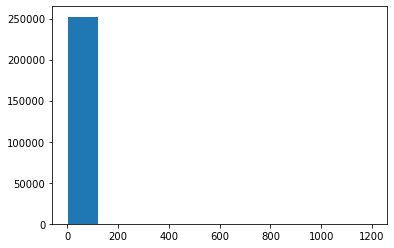

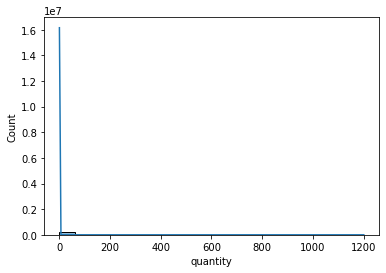

In [39]:
plt.hist(churn['quantity']);
plt.show()
sns.histplot(churn["quantity"], kde = True); # sns.distplot(auto["mpg"]);
plt.show()

The question does not ask for this. This is me testing what we learned in the lesson.

In [40]:
# Is quantity or volume ever negative and why?
churn.corr()

,user_id,store_id,trans_id,item_id,quantity,dollar
user_id,1.000000,0.097718,0.008834,-0.002469,0.006576,0.014330
store_id,0.097718,1.000000,0.276560,-0.004948,0.001320,0.014669
trans_id,0.008834,0.276560,1.000000,-0.001481,-0.003610,0.000123
item_id,-0.002469,-0.004948,-0.001481,1.000000,0.004234,-0.008018
quantity,0.006576,0.001320,-0.003610,0.004234,1.000000,0.322730
dollar,0.014330,0.014669,0.000123,-0.008018,0.322730,1.000000


Reason: Utilize churn.corr() to determine the distribution or summary of statistics to determine if quanity (no volume in this case) is ever negative.

Conclusion: quantity is negative in conjunction with trans_id. This means that those two have a negative correlation and that they have an inverse relationship. As quantity goes up, trans_id goes down and vice versa. 

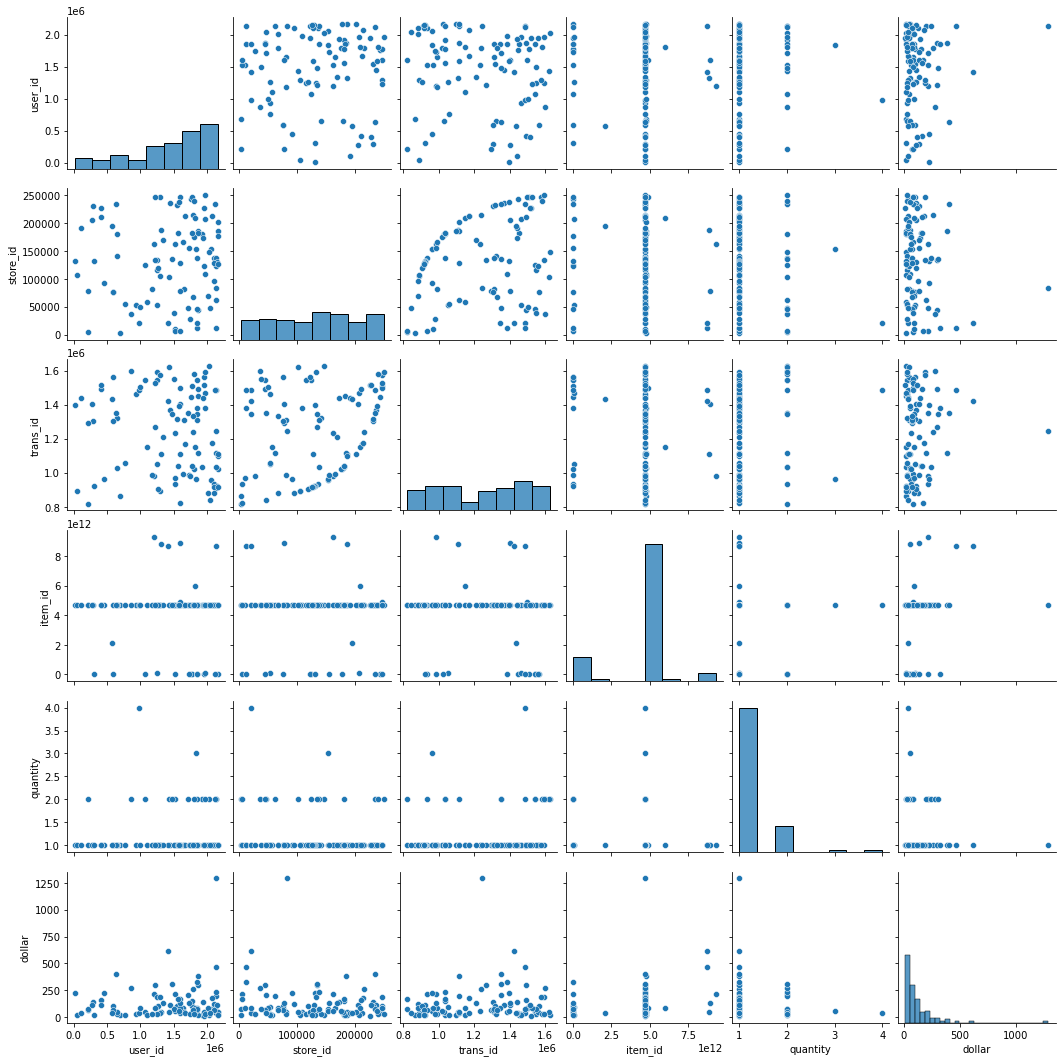

In [41]:
sns.pairplot(churn.sample(100));

In [42]:
# What is the date range covered by the data?
churn.timestamp

0        2000-11-01
1        2000-11-01
2        2000-11-01
3        2000-11-01
4        2000-11-01
            ...    
252199   2001-02-28
252200   2001-02-28
252201   2001-02-28
252202   2001-02-28
252203   2001-02-28
Name: timestamp, Length: 252204, dtype: datetime64[ns]

In [43]:
# Another way
min_date = churn['timestamp'].min()
max_date = churn['timestamp'].max()

print(f"The data ranges from {min_date} to {max_date}")

date_range = max_date - min_date
print(f"The total number of days in the dataset was {date_range}")

The data ranges from 2000-11-01 00:00:00 to 2001-02-28 00:00:00
The total number of days in the dataset was 119 days 00:00:00


Reason: To determine the date range covered by the data, we use the timestamp column to determine the beginning and end date.

Conclusion: The data starts on November 1st 2000 and ends on February 28th 2001. 

5. What are some "not-so-obvious" questions we can ask about this data? What are some important summary statistics and visualizations we should look at to answer them? Note that having domain knowledge can make this easier, so here's a list of questions and your task is to pick at least two questions and answer them using statistical summaries or visualizations:
   - How many transactions on average do users have in a given week? <span style="color:red" float:right>[2 point]</span>
   - Are there items that are more commonly sold in bulk (quantity greater than 1)? <span style="color:red" float:right>[2 point]</span>
   - How do quantity and volume tend to change over the course of the day (hour by hour)? <span style="color:red" float:right>[2 point]</span>
Note that the above questions are intetionally phrased to sound non-technical. It is up to you to "translate" them into something that can be answered by a query on the data or a visualization.

In [44]:
# How many transactions on average do users have in a given week?
churn_data_by_day.avg_trans_per_user.mean()

6.527360870403891

Reason: To determine this, I took the average of the averages of user's transactions per week. See above codes [154] to [166].

Conclusion: The average transaction per user in a given week is 6.5.

In [45]:
# Are there items that are more commonly sold in bulk (quantity great than 1)?
print(churn[(churn['quantity'] >= 2)])

        user_id gender address  store_id  trans_id  timestamp       item_id  \
4        101981      F       E      2864    818467 2000-11-01  4.710000e+12   
5        101981      F       E      2865    818471 2000-11-01  4.710000e+12   
8        101981      F       E      2868    818476 2000-11-01  4.710000e+12   
12       101981      F       E      2872    818490 2000-11-01  4.710000e+12   
13       101981      F       E      2873    818491 2000-11-01  8.800000e+12   
...         ...    ...     ...       ...       ...        ...           ...   
252186  2179605      B       G    251825   1629781 2001-02-28  4.900000e+12   
252187  2179605      B       G    251826   1629783 2001-02-28  4.710000e+12   
252191  2179605      B       G    251830   1629959 2001-02-28  4.710000e+12   
252193  2179605      B       G    251832   1630107 2001-02-28  3.700033e+10   
252199  2179605      B       G    251838   1630692 2001-02-28  2.250000e+12   

        quantity  dollar  
4              8   288.0

In [46]:
len(churn[(churn['quantity']>= 2)])

54810

Reason: To determine this, I searched for all the rows under quantity that had 2 or greater.

Conclusion: There are 54,810 more commonly sold in bulk. 

How do quantity and volume tend to change over the course of the day (hour by hour)?
Reason: See conclusion

Conclusion: 

The transactions only happen at midinght and subsequently can not be determined hour by hour in this data.

6. Do the results mesh with what we expected? Note that to answer this we need to have some domain knowledge, so you can ignore this for the assignment. <span style="color:red" float:right>[0 point]</span>

What did we expect?

Ignoring this for the assignment as stated in the question.

7. What are additional features we could extract from the data? This is especially relevant if the data contains a timestamp column or raw text column (such as a full address for example). <span style="color:red" float:right>[1 point]</span>

In [47]:
# Money spent by gender
money_spent_by_gender = churn.groupby("gender")["dollar"].sum()
money_spent_by_gender

gender
A    1150031.0
B    3069654.0
C    5855626.0
D    7231410.0
E    6187135.0
F    3924519.0
G    2103971.0
H    1006916.0
I     750767.0
J     905495.0
K     830852.0
Name: dollar, dtype: float64

Reason: Determining other ideas that we could extract from the data. In this case, I searched for money spent by gender and had other ideas below.

Conclusion: Each gender, A-K, has a different amount spent with 'D' being the most at over 7 million and 'I' being the lowest with approximately 750,000. 

Other ideas:

-Total taxes (if tax amount known) on total value by year, day, or timeframe

-Most or least sold items by month

-Average quantity sold per day of week, Reason: Stock more of that item day before or put more people on shift that day of week

8. Do I see any relationships between the features in the data? You will need to back this up with some statistical summaries or visualizations like what we covered in the lab. <span style="color:red" float:right>[2 point]</span>

In [48]:
churn.describe()

,user_id,store_id,trans_id,item_id,quantity,dollar
count,2.522040e+05,252204.000000,2.522040e+05,2.522040e+05,252204.000000,252204.000000
mean,1.395660e+06,126101.500000,1.229771e+06,4.467833e+12,1.385692,130.911389
std,6.094769e+05,72805.167983,2.350992e+05,1.679512e+12,3.705732,388.142169
min,1.113000e+03,0.000000,8.177470e+05,2.000882e+07,1.000000,1.000000
25%,9.937150e+05,63050.750000,1.025926e+06,4.710000e+12,1.000000,42.000000
50%,1.586046e+06,126101.500000,1.233476e+06,4.710000e+12,1.000000,76.000000
75%,1.862232e+06,189152.250000,1.433222e+06,4.710000e+12,1.000000,132.000000
max,2.179605e+06,252203.000000,1.635482e+06,9.790000e+12,1200.000000,70589.000000


In [49]:
churn_data_by_day.describe()

,weekday,transactions,unique_users,items,total_quantity,avg_quantity,total_value,avg_value,week,avg_trans_per_user
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2.991667,2101.700000,308.816667,172.866667,2912.308333,1.393256,275136.466667,130.071397,8.066667,6.527361
std,2.002082,1217.639828,130.160210,75.561643,1649.956948,0.117016,163390.720797,23.025708,4.953113,1.211733
min,0.000000,167.000000,23.000000,18.000000,230.000000,1.225131,14121.000000,73.931937,0.000000,4.517241
25%,1.000000,1403.250000,248.000000,132.000000,1956.750000,1.325366,182209.500000,117.656958,4.000000,5.606898
50%,3.000000,1824.500000,296.000000,156.000000,2563.000000,1.365582,235626.500000,126.216818,8.000000,6.197528
75%,5.000000,2806.250000,392.500000,218.250000,3785.500000,1.428883,360170.250000,138.651957,12.000000,7.435935
max,6.000000,6402.000000,685.000000,398.000000,8727.000000,2.099330,860226.000000,224.650424,16.000000,9.788991


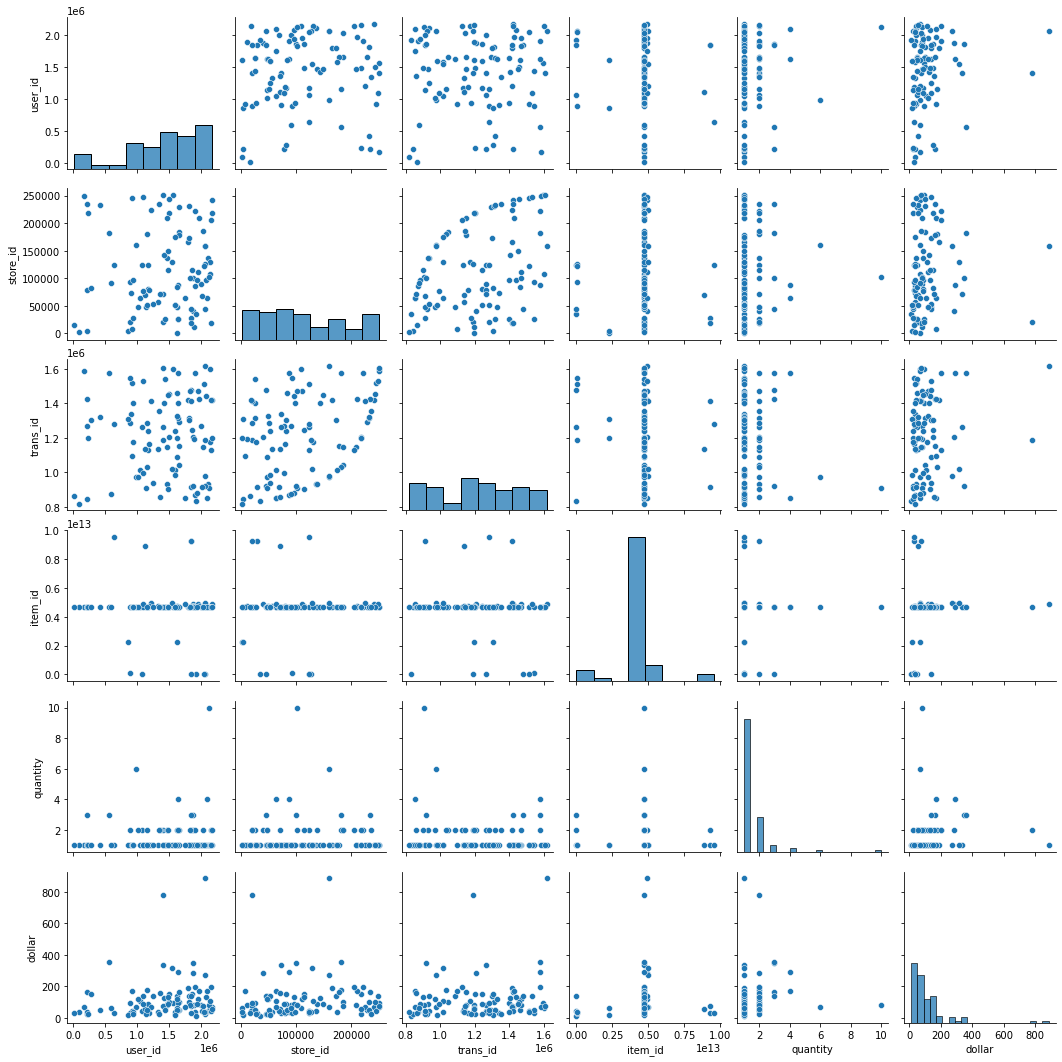

In [50]:
sns.pairplot(churn.sample(100));

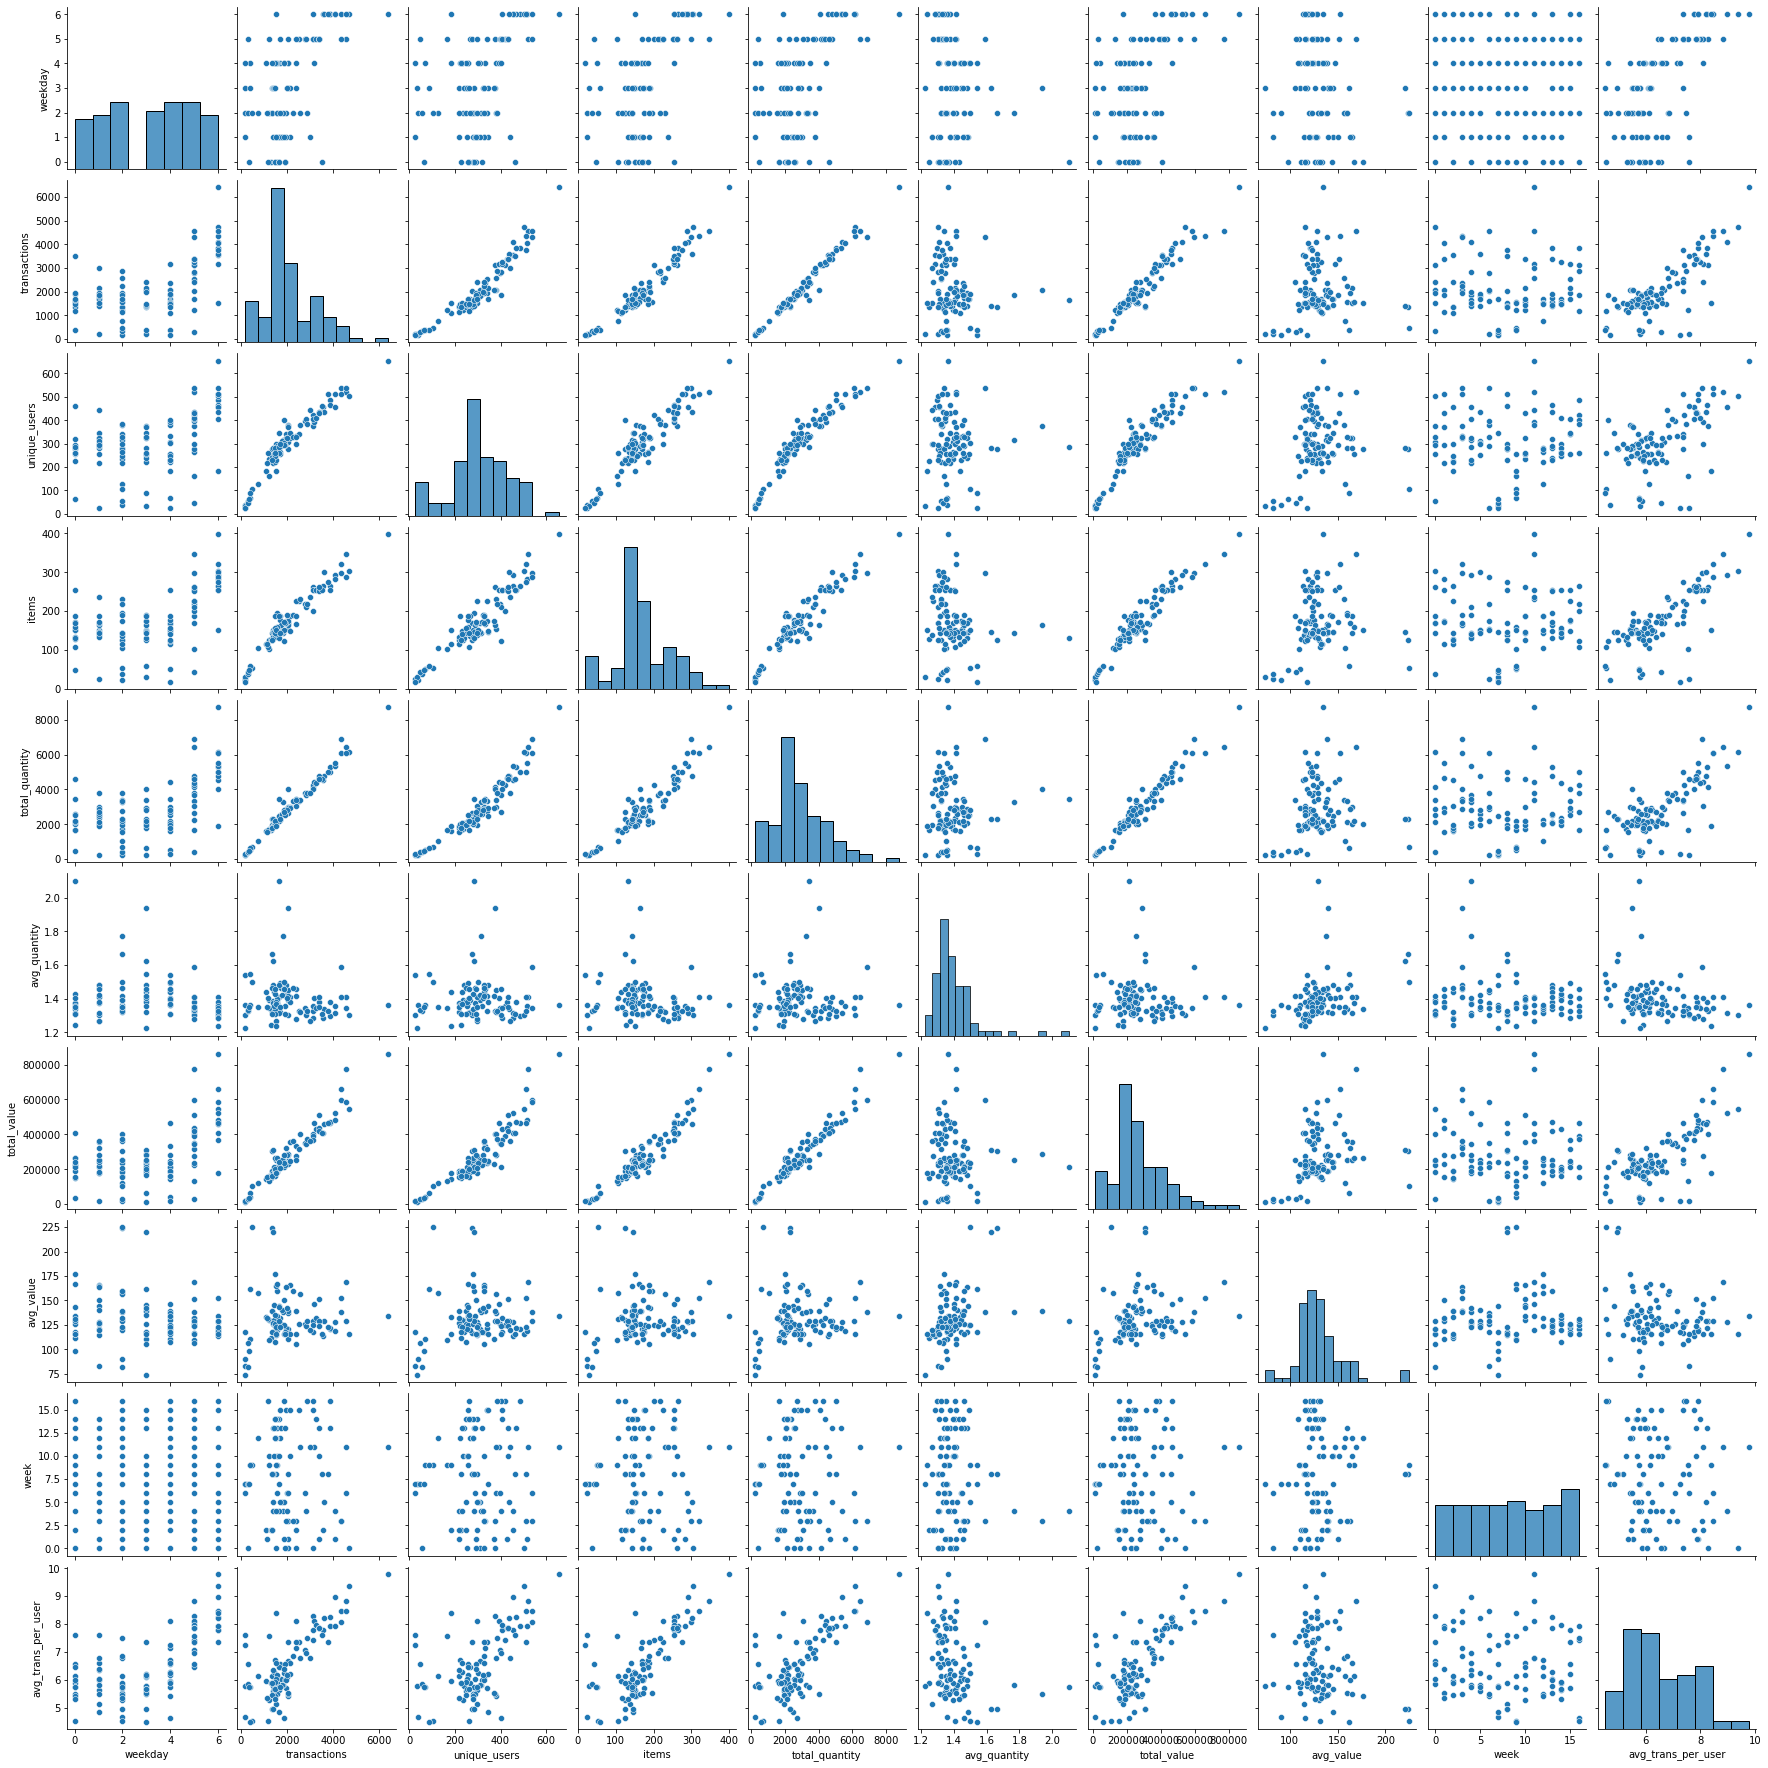

In [51]:
sns.pairplot(churn_data_by_day.sample(100));

<AxesSubplot:>

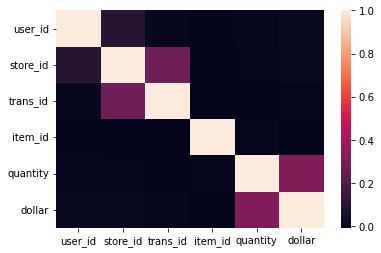

In [52]:
sns.heatmap(churn.corr())

<AxesSubplot:>

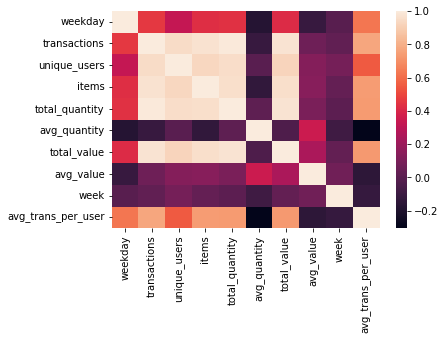

In [53]:
sns.heatmap(churn_data_by_day.corr())

<AxesSubplot:>

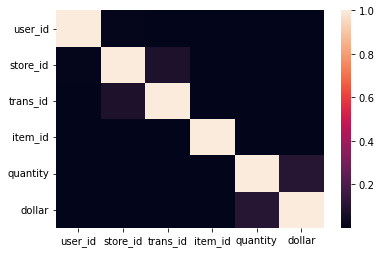

In [54]:
sns.heatmap(churn.corr()*churn.corr())

<AxesSubplot:>

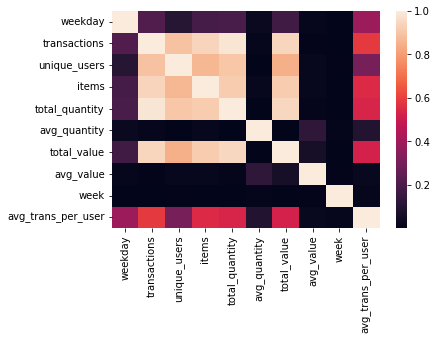

In [55]:
sns.heatmap(churn_data_by_day.corr()*churn_data_by_day.corr())

Reason: To see any relationships between the features in the data using .describe, pairplot, and heatmaps.

Conclusion: Displayed are some statistical summaries and visualizations (pairplot and heatmaps) that we covered in the lab. I ran these on two dataframes, one for churn and the other for churn_data_by_day. 

Run EDA on the data and answer the above questions and any additional questions that may cross your mind along the way. As you can imagine, there isn't a single way to proceed, and the answer doesn't always have to be exact. It is up to you to decide how you want to convey the results, but assume that your audience is non-technical and not familiar with some of the terminology we learned in the lecture.

There are also third-party libraries we can used to run EDA. One example is the `pandas-profiling` library which provides us with a full report. You do not need to use it in this assignment, but we recommend that you install it and take a look on your own time.

In [56]:
!pip install ydata-profiling

from pandas_profiling import ProfileReport
prof = ProfileReport(churn_data_by_day)
prof.to_file(output_file='Lesson_04.html')

/tmp/ipykernel_997/4111541115.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# End of assignment